## Loan Application Status Prediction
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
#Importing Libararies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
# Reading top 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Reading bottom 5 rows
df.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
print("The shape of Dataset is :",df.shape)

The shape of Dataset is : (614, 13)


We got 614 rows and 13 columns-<br>
Loan_Status is our target column


In [6]:
#checking for duplicates
df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# Checking for columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
#checking for info of the columns that includes datatype,memory and null info as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# We can see few column with null values/missing data lets check it as well
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We are able to depict the missing values information in a bar plot format where we can clearly see that there are null data present in below columns:

- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

In [10]:
df.isnull().sum().sum()

149

## Filling the null values using different technique

__Filling the null value of 'Gender'Column with mode method__

In [11]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [13]:
df['Gender'].isnull().sum()

0

__Filling the Null values in Married columns__

In [14]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df['Married'].nunique()

2

In [16]:
#filling null values using mode method
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [17]:
df['Married'].isnull().sum()

0

In [18]:
df['Dependents'].value_counts()       

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
#filling null values using mode method as 0 is a frquent number in this column
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [20]:
df['Dependents'].isnull().sum()       

0

In [21]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
## Filling the null value with mode method as yes is appearng more time
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [23]:
df['Self_Employed'].isnull().sum()

0

In [24]:
df['LoanAmount'].describe()


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [25]:
df['LoanAmount'].skew()

2.677551679256059

It has more skewness so we fill the null values using median method


In [26]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [27]:
df['LoanAmount'].isnull().sum()

0

In [28]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [29]:
df['Loan_Amount_Term'].skew()

-2.362414124216269

It has more skewness (negative)so we fill the null values using mean method


In [30]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [31]:
df['Loan_Amount_Term'].isnull().sum()

0

In [32]:
df['Credit_History'].nunique()

2

In [33]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

It might be missed during entry or doesnt have any previous credit, so left blank. I choose to fill with no previous i.e 0 .



In [34]:
df['Credit_History'].fillna(0,inplace=True)


In [35]:
### Chekcing for null again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
# Dropping Loan_ID column as it has no  impact on target column
df=df.drop('Loan_ID',axis=1)

In [37]:
df.shape

(614, 12)

In [38]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.773616
std,6109.041673,2926.248369,84.107233,64.372489,0.418832
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Observations-
1- we get only continous data statistics.<br>
2- Similarly, the mean column gives the average mean information of the columns, the std column shows the standard deviation data, min provides the minimum data present in the numeric columns, 25%-50%-75% gives the first quartile, second quartile and third quartile data for each numeric column and max provides the maximum data present in each of the columns.

# Exploratory Data Analysis(EDA)

__Exploring categorical columns:__<br>
__'Gender' 'Married', 'Dependents', 'Education', 'Self_Employed'__

<AxesSubplot:xlabel='Gender', ylabel='count'>

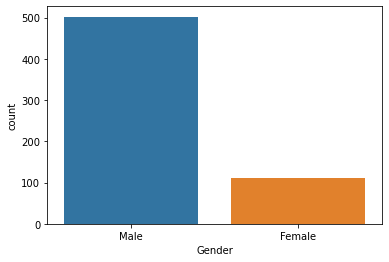

In [40]:

sns.countplot(df['Gender'])

__Male Applicants are higher than female applicants for Loan__

<AxesSubplot:xlabel='Married', ylabel='count'>

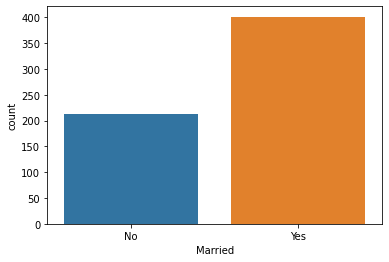

In [41]:
sns.countplot(df['Married'])

__Married people are more than unmarried people__

<AxesSubplot:xlabel='Dependents', ylabel='count'>

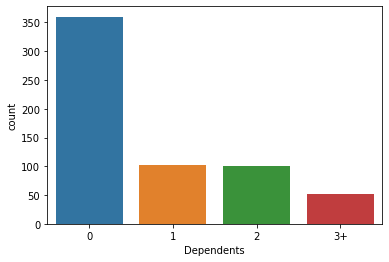

In [42]:
sns.countplot(df['Dependents'])

__applicants who have 0 dependents are more than any other category__

<AxesSubplot:xlabel='Education', ylabel='count'>

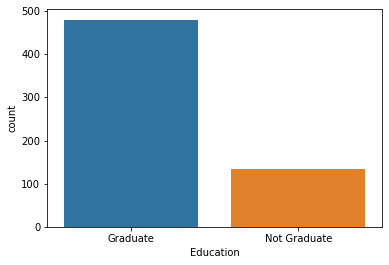

In [43]:
sns.countplot(df['Education'])

__Count of Graduate Applicants are more than non-Graduate applicants__

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

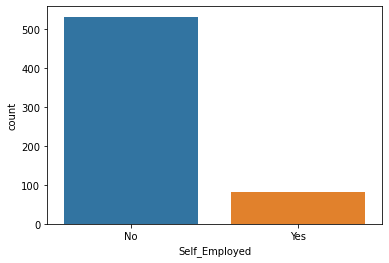

In [44]:
sns.countplot(df['Self_Employed'])

__SelfEmployed people are less as compare to non_selfemployed__

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

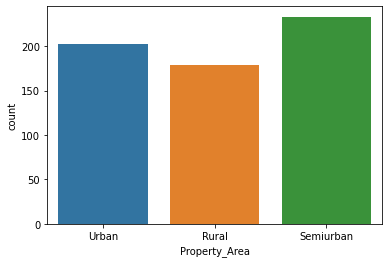

In [45]:
sns.countplot(df['Property_Area']) 


__People who are living in Urban or Semiurban area are more than people who are living in Rural area__

#### Exploring Continous columns

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

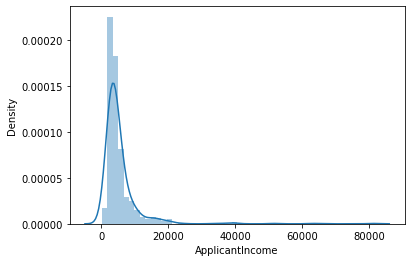

In [46]:
sns.distplot(df['ApplicantIncome'])

__It seems rightly skewed data i.e Outliers could be there, lets confirm i by lotting box_plots of the column__

<AxesSubplot:xlabel='ApplicantIncome'>

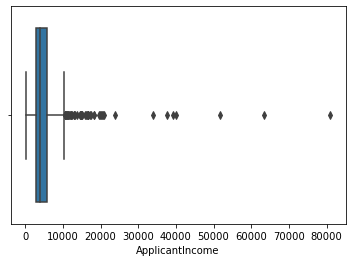

In [47]:
sns.boxplot(df['ApplicantIncome'])

__Outliers are present in this column so we need to handle this as well__

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

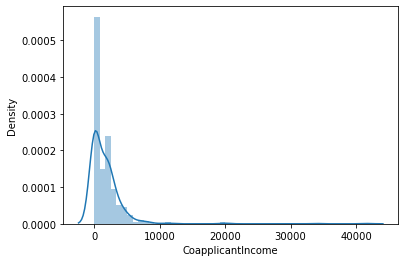

In [48]:
sns.distplot(df['CoapplicantIncome'])

__It seems rightly skewed data i.e Outliers could be there, lets confirm it by lotting box_plots of the column__

<AxesSubplot:xlabel='CoapplicantIncome'>

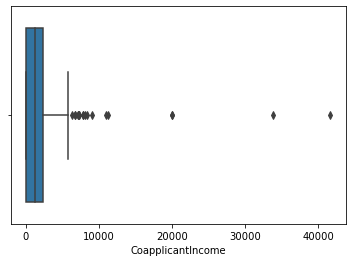

In [49]:
sns.boxplot(df['CoapplicantIncome'])

__Outliers are present in this column so we need to handle this as well__

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

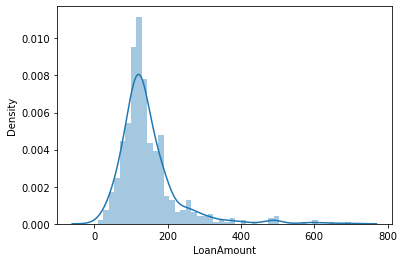

In [50]:
sns.distplot(df['LoanAmount'])

__It seems rightly skewed data i.e Outliers could be there, lets confirm it by lotting box_plots of the column__

<AxesSubplot:xlabel='LoanAmount'>

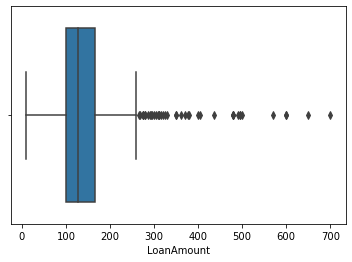

In [51]:
sns.boxplot(df['LoanAmount'])

__Outliers are present in this column so we need to handle this as well__

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

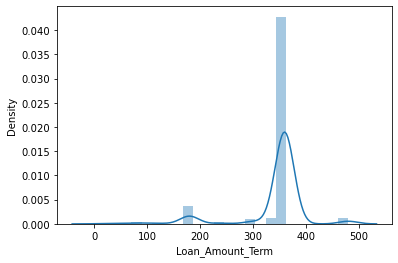

In [52]:
sns.distplot(df['Loan_Amount_Term'])

__left skewed data__

<AxesSubplot:xlabel='Loan_Amount_Term'>

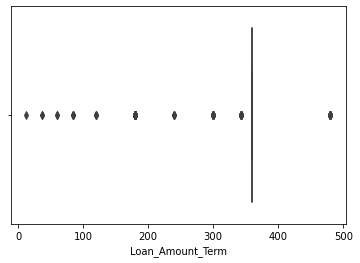

In [53]:
sns.boxplot(df['Loan_Amount_Term'])

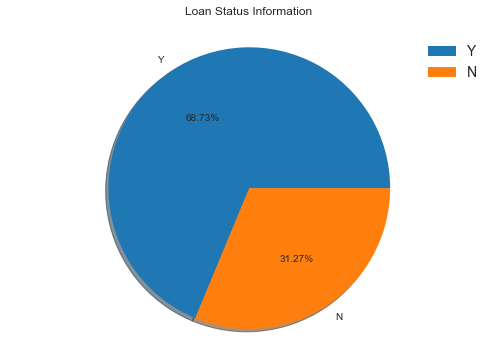

In [54]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see that our target label has 68.73% of loan approved status while 31.27% of loan rejected status. This indicated a class imbalance that will need to be treated before building our machine learning models

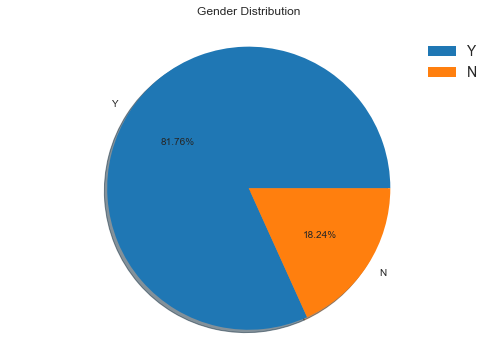

In [55]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Gender'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see that the number of males cover 81.76% of the rows in Gender column while females cover only 18.24% of rows.

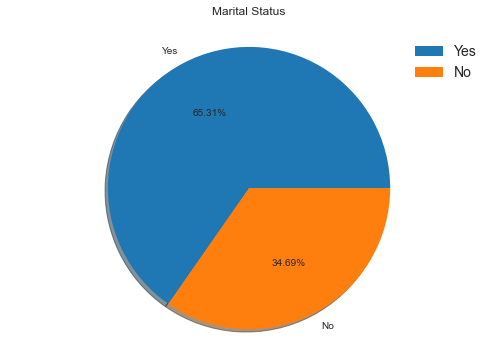

In [56]:
plt.figure(figsize=(7,5))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see that 65.31% of rows in Married column are filled with married people and the remaining 34.69% of rows are filled with unmarried people.

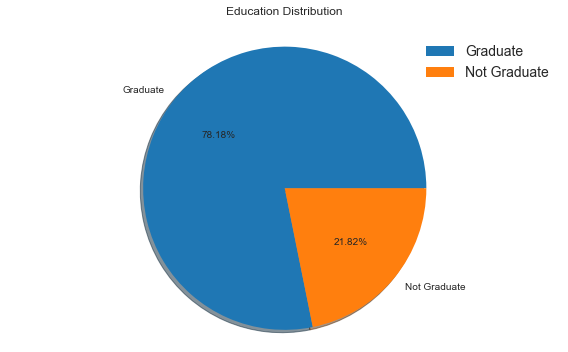

In [57]:
plt.figure(figsize=(8,5))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see that 78.18% of rows present in Education column are filled with graduates while the remaining 21.82% rows are filled with under graduate people.

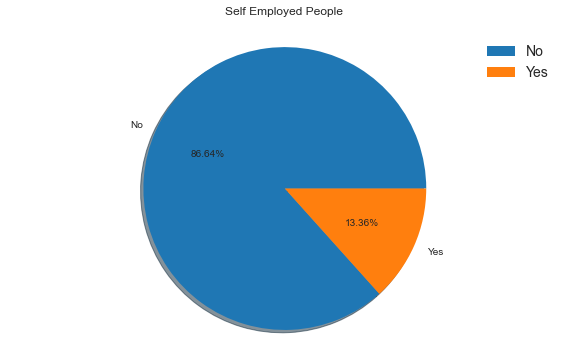

In [58]:
plt.figure(figsize=(8,5))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self Employed People\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see that 86.64% people are not self employed and might be working with either private or government sectors while only 13.36% people are self employed owning their businesses.

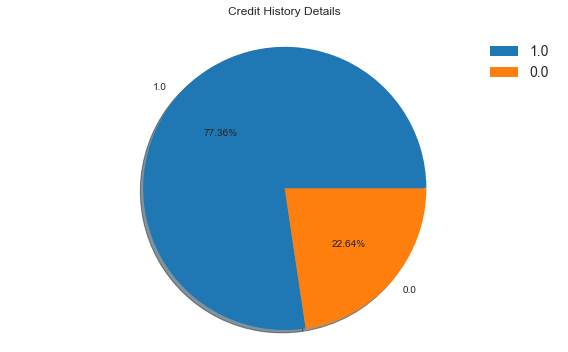

In [59]:
plt.figure(figsize=(8,5))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit History Details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see that 1.0 represent that credit history is available and 0.0 represent that credit history is not available. For 85.50% of people we have the credit history information available while 14.50% people do not have any credit history.

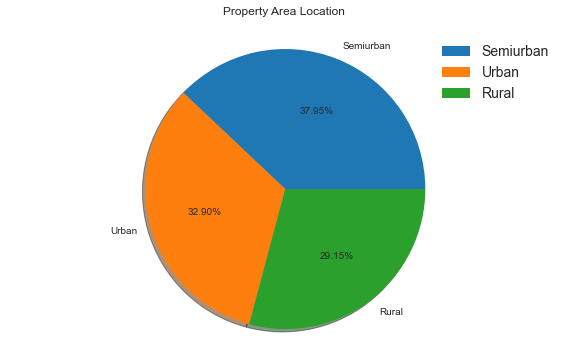

In [60]:
plt.figure(figsize=(8,5))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property Area Location\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see that 37.95% rows are covered by semi urban area type, 32.90% rows are covered by urban area type and 29.15% rows are covered by rural area type in our property area column.

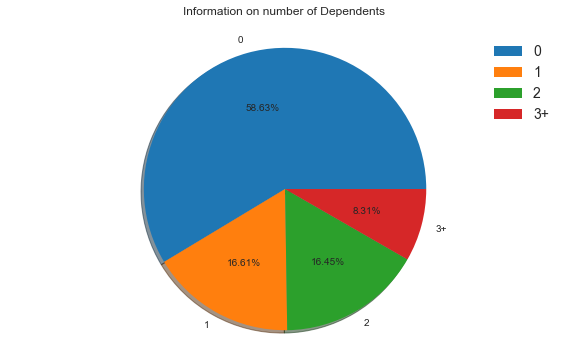

In [61]:
plt.figure(figsize=(8,5))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Information on number of Dependents\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie chart we can see the total number of dependants where 56.63% rows are covered with people having 0 dependents, 16.61% rows covered with people having 1 dependent, 16.45% rows covered with people having 2 dependents and 8.31% rows covered with people having 3 or more dependents.

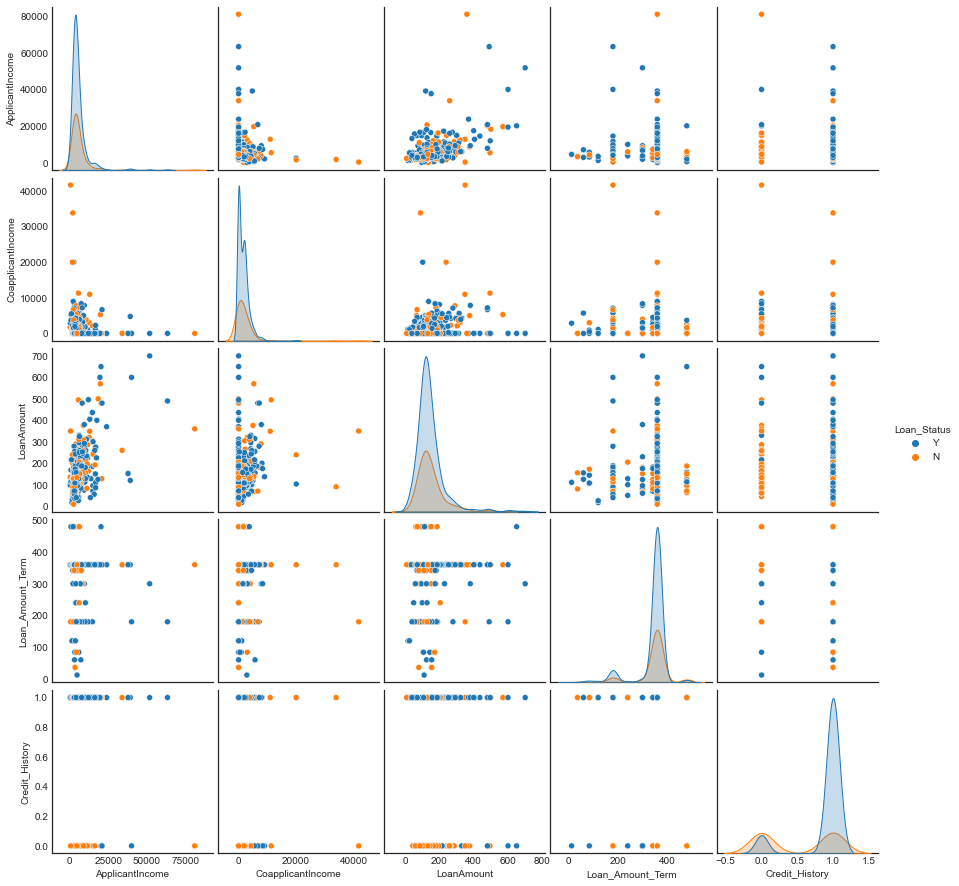

In [62]:

sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
plt.show()

I have generated the above pairplot for our continous data columns that shows us how the data points are distributed in each of the numeric datatype columns.

## Lets check the skewness of the dataset using .skew() method

In [63]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
dtype: float64

###  It is shwoing highly skewed columns ,,but before handling skewness lets transform our objectdatatype into int/float datatype using transformation technique

In [64]:
from sklearn.preprocessing import LabelEncoder


In [65]:
le=LabelEncoder()

In [66]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [67]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])


In [68]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


__Every column whhich was Object datatype has converted into int datatype__

## Using zscore to remove outliers

In [70]:
from scipy.stats import zscore

In [71]:
z=abs(zscore(df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.211241,0.279851,0.540954,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.211241,0.279851,0.540954,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.948996,0.279851,0.540954,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.306435,0.279851,0.540954,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.056551,0.279851,0.540954,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.889500,0.279851,0.540954,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.258378,2.518655,0.540954,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.276168,0.279851,0.540954,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.490816,0.279851,0.540954,1.223298,0.674519


In [72]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [73]:
print("Shape before Outlier Removal",df.shape)
print("Shape After Outlier Removal",df_new.shape)


Shape before Outlier Removal (614, 12)
Shape After Outlier Removal (577, 12)


In [74]:
dataloss=1-(577/614)
print("Dataloss:",dataloss)

Dataloss: 0.06026058631921827


6% of data is lost
__checking for skewness again__



In [75]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [76]:
## Skewness is stil there, 

### Using Log Transform to fix skewness in continous columns


In [77]:
print("Min value of the column",df_new['ApplicantIncome'].min())
print("\nSkewness before np.log method",df_new['ApplicantIncome'].skew())

Min value of the column 150

Skewness before np.log method 2.148522232025973


In [78]:
df_new['ApplicantIncome']=np.log(df_new['ApplicantIncome'])

In [79]:
print("\nSkewness after np.log method",df_new['ApplicantIncome'].skew())


Skewness after np.log method -0.20796709470129843


In [80]:
print("Min value of the column",df_new['CoapplicantIncome'].min())
print("\nSkewness before np.log method",df_new['CoapplicantIncome'].skew())

Min value of the column 0.0

Skewness before np.log method 1.3505169763920721


In [81]:
## It has min value of 0, so we need t add 1 as a constant so that np.log method can work on it
df_new['CoapplicantIncome']=np.log(df['CoapplicantIncome']+1)
print("\nSkewness after np.log method",df_new['CoapplicantIncome'].skew())


Skewness after np.log method -0.21675695794770106


In [82]:
print("MIn value of the column",df_new['LoanAmount'].min())
print("\nSkewness before np.log method",df_new['LoanAmount'].skew())

MIn value of the column 9.0

Skewness before np.log method 1.15152511392864


In [83]:
df_new['LoanAmount']=np.log(df['LoanAmount'])
print("\nSkewness after np.log method",df_new['LoanAmount'].skew())


Skewness after np.log method -0.7124323701517151


In [84]:
print("MIn value of the column",df_new['Loan_Amount_Term'].min())
print("\nSkewness before np.log method",df_new['Loan_Amount_Term'].skew())

MIn value of the column 180.0

Skewness before np.log method -2.077031480435139


We will use square transformation method here since the skewness is -ve.



In [85]:
df_new['Loan_Amount_Term']=np.log(df_new['Loan_Amount_Term'])
print("\nSkewness after square method",df_new['Loan_Amount_Term'].skew())


Skewness after square method -2.7259670689034716


In [86]:
df_new.skew()


Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome   -0.216757
LoanAmount          -0.712432
Loan_Amount_Term    -2.725967
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We are only concerned with the continous columns skewness.

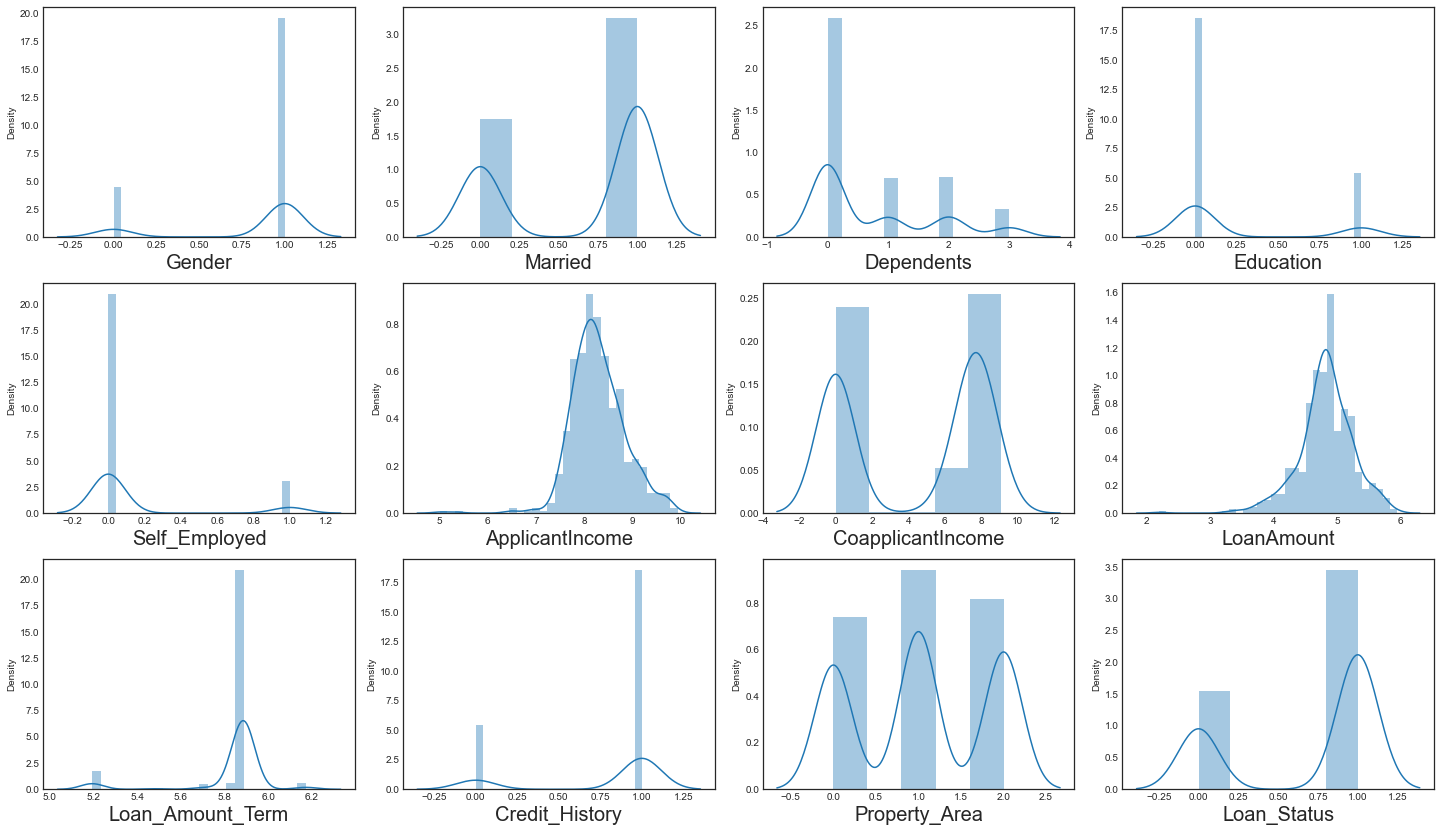

In [87]:
## Visulaising the data now
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1

for column in df_new:
    if plot_number<=17: 
        ax=plt.subplot(4,4,plot_number)
        sns.distplot(df_new[column]) 
        plt.xlabel(column,fontsize=20)
        
        
    plot_number +=1
    
    
plt.tight_layout() 

## Correlation using a Heatmap

<AxesSubplot:>

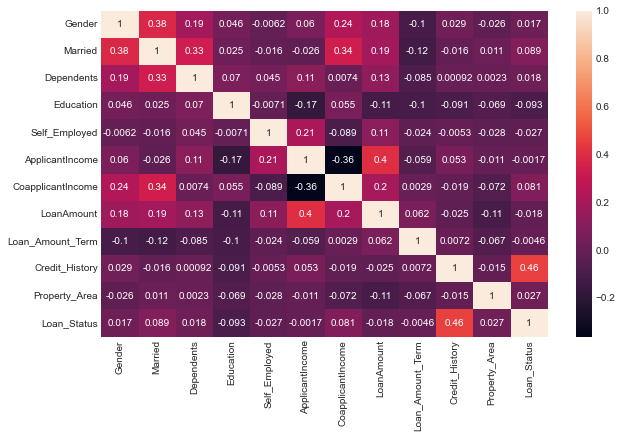

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),annot=True)

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.<br>
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

Here we do not see any multicolinerilty and coorelation, so we are good to go with all the columns.

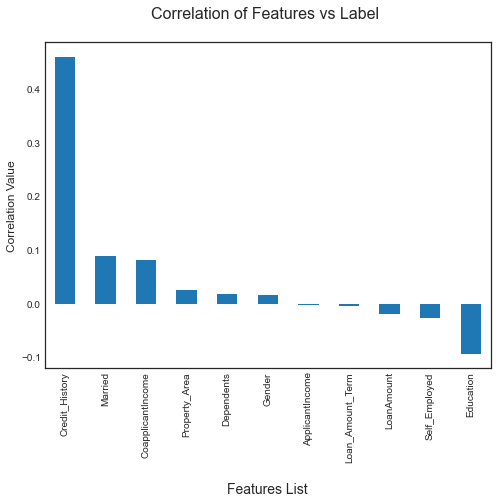

In [89]:
df_corr = df_new.corr()
plt.figure(figsize=(8,6))
df_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.title("Correlation of Features vs Label \n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clear picture on positive and negative correlation columns we have generated this bar plot and we see that columns loan amount term, loan amount, coapplicant income and education are negatively correlated while all the remaining feature columns are positively correlated with our label column.


## Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label

In [90]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

I have bifurcated the dataset into features and labels where x represents all the feature columns and y represents the target label column.



In [91]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674026,0.000000,4.852030,5.886104,1.0,2
1,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,1.0,0
2,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.0,2
3,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,1.0,2
4,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.000000,4.262680,5.886104,1.0,0
610,1,1,3,0,0,8.320205,0.000000,3.688879,5.192957,1.0,0
611,1,1,1,0,0,8.996157,5.484797,5.533389,5.886104,1.0,2
612,1,1,2,0,0,8.933664,0.000000,5.231109,5.886104,1.0,2


## Resolving the class imbalance issue in our label column

In [92]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [93]:
from imblearn.over_sampling import SMOTE


In [94]:
sm=SMOTE()
x,y = sm.fit_resample(x, y)

In [95]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

### Scaling the Features

In [96]:
scaler=StandardScaler()
X=scaler.fit_transform(x)


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding best random state for building Regression Models

In [98]:
sc=0
rs=0
lr=LogisticRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>sc:
        sc=acc
        rs=i
print(f'Best accuracy {sc} at random state {rs}')

Best accuracy 0.81875 at random state 10


Great so with the help of random state selection process we have found our lucky number to be 239 amongst 1-1000



### Creating the training and testing data sets

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


In [100]:
print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of x_test",x_test.shape)

Shape of x_train (636, 11)
Shape of y_train (636,)
Shape of x_test (160, 11)
Shape of x_test (160, 11)


In [101]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

### Machine Learning Model for Classification with Evaluation Metrics

In [2]:

def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=239)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))
    print("Accuracy Score:", acc_score)
    
    
    #confusion matrix:
    print('confusion matrix:\n',confusion_matrix(y_test,pred))
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

## Logistic Regression



In [103]:
model=LogisticRegression()
classify(model, X, y)

Accuracy Score: 0.78125
confusion matrix:
 [[47 28]
 [ 7 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.63      0.73        75
           1       0.74      0.92      0.82        85

    accuracy                           0.78       160
   macro avg       0.80      0.77      0.77       160
weighted avg       0.80      0.78      0.78       160

Cross Validation Score: 0.7261556603773586

Accuracy Score - Cross Validation Score is 0.05509433962264143


Accuracy is good but Accuracy Score - Cross Validation Score is 0.055 which is not thatmuch less<br>
Lets check with other model as well.

##  DecisionTreeClassifier()

In [106]:
model=DecisionTreeClassifier()
classify(model, X, y)

Accuracy Score: 0.6875
confusion matrix:
 [[52 23]
 [27 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68        75
           1       0.72      0.68      0.70        85

    accuracy                           0.69       160
   macro avg       0.69      0.69      0.69       160
weighted avg       0.69      0.69      0.69       160

Cross Validation Score: 0.7387578616352202

Accuracy Score - Cross Validation Score is -0.05125786163522017


Accuracy is good but Accuracy Score - Cross Validation Score is in negative so not selcting this model <br>
Lets check with other model as well.

## RandomForestClassifier()

In [107]:
model=RandomForestClassifier()
classify(model, X, y)

Accuracy Score: 0.8
confusion matrix:
 [[57 18]
 [14 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        75
           1       0.80      0.84      0.82        85

    accuracy                           0.80       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.80      0.80      0.80       160

Cross Validation Score: 0.7877672955974843

Accuracy Score - Cross Validation Score is 0.012232704402515782


Accuracy and f1 score  is good but Accuracy Score - Cross Validation Score is 0.001 which is lowest til now<br>
Lets check with other model as well.

## SVC()

In [109]:
model=SVC()
classify(model, X, y)

Accuracy Score: 0.73125
confusion matrix:
 [[45 30]
 [13 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.60      0.68        75
           1       0.71      0.85      0.77        85

    accuracy                           0.73       160
   macro avg       0.74      0.72      0.72       160
weighted avg       0.74      0.73      0.73       160

Cross Validation Score: 0.7311792452830189

Accuracy Score - Cross Validation Score is 7.07547169810363e-05


__Not selecting SVC as it also has negative difference between Accuracy Score - Cross Validation Score 
 

## GradientBoostingClassifier

In [112]:
model=GradientBoostingClassifier()
classify(model, X, y)



Accuracy Score: 0.75625
confusion matrix:
 [[47 28]
 [11 74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71        75
           1       0.73      0.87      0.79        85

    accuracy                           0.76       160
   macro avg       0.77      0.75      0.75       160
weighted avg       0.77      0.76      0.75       160

Cross Validation Score: 0.7513050314465408

Accuracy Score - Cross Validation Score is 0.004944968553459161


__lowest diiferenc between accuracy and cv score .004, which is the lowest till now__

## KNeighbors Classifier


In [115]:
from sklearn.neighbors import KNeighborsClassifier


In [116]:

model=KNeighborsClassifier()
classify(model, X, y)

Accuracy Score: 0.7
confusion matrix:
 [[48 27]
 [21 64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        75
           1       0.70      0.75      0.73        85

    accuracy                           0.70       160
   macro avg       0.70      0.70      0.70       160
weighted avg       0.70      0.70      0.70       160

Cross Validation Score: 0.7148663522012578

Accuracy Score - Cross Validation Score is -0.01486635220125787


__it has Accuracy Score - Cross Validation Score in negative so skipping this model as well .__

__GradientBoostingClassifier has acuracy of 0.75 and the difference between Accuracy Score - Cross Validation Score is 0.004-, So selecting GradientBoostingClassifier as our final model__

In [118]:
gdb=GradientBoostingClassifier()
gdb.fit(x_train,y_train)
predn=gdb.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,predn))
print("Confusion Matrix\n",confusion_matrix(y_test,predn))
print("Classification Report:",classification_report(y_test,predn))


Accuracy Score: 0.775
Confusion Matrix
 [[50 22]
 [14 74]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.69      0.74        72
           1       0.77      0.84      0.80        88

    accuracy                           0.78       160
   macro avg       0.78      0.77      0.77       160
weighted avg       0.78      0.78      0.77       160



## Hyper parameter tuning on the best Classification ML Model

In [121]:
from sklearn.model_selection import GridSearchCV


In [119]:
par={'n_estimators':[100,200,500],'random_state':[18],'init':['estimator','zero']
    ,'max_features':['auto','sqrt','log2'],'max_leaf_nodes':range(0,50,5)}

In [122]:
grid = GridSearchCV533(GradientBoostingClassifier(), par, verbose = 1, cv=5, n_jobs = -1)

In [123]:
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)
print('score: ',grid.best_score_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
score:  0.7484375
best estimators: GradientBoostingClassifier(init='zero', max_features='sqrt', max_leaf_nodes=10,
                           n_estimators=500, random_state=18)
best parameters: {'init': 'zero', 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'n_estimators': 500, 'random_state': 18}
score:  0.7484375


In [125]:
gbc_final=GradientBoostingClassifier(init='zero', max_features='sqrt', max_leaf_nodes=10,
                           n_estimators=500, random_state=18)
gbc_final.fit(x_train,y_train)
pred_gbc=gbc_final.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred_gbc))
print("Confusion Matrix\n",confusion_matrix(y_test,pred_gbc))
print("Classification Report:\n",classification_report(y_test,pred_gbc))

Accuracy Score: 0.76875
Confusion Matrix
 [[53 19]
 [18 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74        72
           1       0.79      0.80      0.79        88

    accuracy                           0.77       160
   macro avg       0.77      0.77      0.77       160
weighted avg       0.77      0.77      0.77       160



__Earlier Accuracy was 0.75 now its 0.768(improved) .__

In [128]:
results=pd.DataFrame({})
results['Actual']=y_test
results['Predicted']=predn
results

,Actual,Predicted
27,1,1
476,0,0
396,1,1
390,1,0
687,0,0
...,...,...
586,0,0
647,0,0
501,1,1
309,1,0


The output is in 0 and 1 , as we encoded ... but we want to see the normal. So let us reverse them.



In [129]:
#Reversing the encoded values in prediction
ractual=le.inverse_transform(y_test)
ractual

array(['Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y'], dtype=object)

In [130]:
rpredicted=le.inverse_transform(predn)
rpredicted

array(['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'Y'], dtype=object)

In [131]:
results['Actual_O']=ractual
results['Predicted_r']=rpredicted
results

,Actual,Predicted,Actual_O,Predicted_r
27,1,1,Y,Y
476,0,0,N,N
396,1,1,Y,Y
390,1,0,Y,N
687,0,0,N,N
...,...,...,...,...
586,0,0,N,N
647,0,0,N,N
501,1,1,Y,Y
309,1,0,Y,N


## AUC - ROC curve

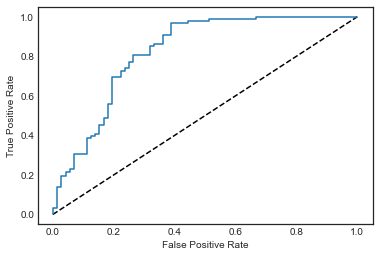

Score: 0.7657828282828283


In [132]:
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=gbc_final.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,gbc_final.predict(x_test))
print('Score:',auc_score)

## Confusion Matrix

In [134]:
from sklearn import metrics

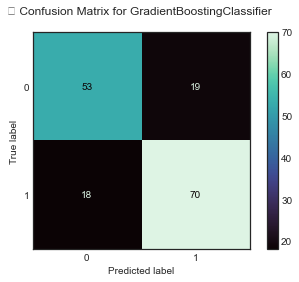

In [135]:
class_names = df_new.columns
metrics.plot_confusion_matrix(gbc_final, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for GradientBoostingClassifier \n')
plt.show()


With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

## Saving the model

In [138]:
import pickle

In [139]:
filename='Loan-prediction.pkl'

In [141]:
pickle.dump(gbc_final,open(filename,'wb'))

In [142]:
#conclusion
loaded_model=pickle.load(open('Loan-prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

76.875


In [143]:
#Conslusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predcited','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predcited,1,0,1,0,0,0,1,0,0,0,...,1,1,1,1,0,0,0,1,0,1
Orignal,1,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,1,0,0,0,1


## Steps: I Followed in the above Dataset.

- imported the required libraries

- loaded the dataset and checked for shape,datatype information, columns and checked for null /missing value(if any) and took the neccessary step

- Checked for unique values count and plot a bar of it(count plot)

- plotted distplot,boxplot and pie for more detailed EDA 

- Described the dataset using .describe() method and wrote down the observation for min, max, mean ,std and skewness.

- Visulise the skewness using distplot boxplot techniques after cheking it using.skew() method.

- Encoded categorical columns into numerical /int datatype

- Used zscore() method to remove outliers and again checked for skewness and found skewness in dataset so used np.log() method and again chekd for skewness .


- Checked for Multicoliearity and cooreation using .corr() method and heatmap plot and dropped the highly correlated fetures( if any)

-  Plotted bar plot to undersatnd the positive and negative related fetaures to target

- Split the dataset into features and label and applying transormation on feature using StandardScaler method.

- Found the best random_state and wrote down single function for mulitple model evaluation.

- Evaluate the different models based on score, f1score

- Calculated CV score and selected the best model which had least difference between accuracy and CV score(GradientBoostingClassifier).

- Hypertuned the parameter using GridsearchCV and again calculated the scores and improved the accuracy score saved the model with hypertuned parameter(GradientBoostingClassifier)(from 0.75 to 0.768) .

- vislauize the model

- Plotted AUC ROC curve

- printed confusion Matrix

- Saved the model using pickle library

- Compared the predicted and Original values